In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [2]:
financeData = pd.read_csv('/Users/cemdavran/Desktop/results.csv')
financeData.head()

,CompanyName,Hour,HighestPrice,HighestOccured
0,BYND,9,137.970001,2020-05-14 09:39:00
1,BYND,10,139.559998,2020-05-14 10:31:00
2,BYND,11,141.000000,2020-05-14 11:15:00
3,BYND,12,138.240005,2020-05-14 12:57:00
4,BYND,13,137.789902,2020-05-14 13:00:00


In [3]:
companyList = financeData['CompanyName'].unique()
companyList

array(['BYND', 'DDOG', 'FB', 'NFLX', 'OKTA', 'PINS', 'SHOP', 'SNAP', 'SQ',
       'TTD'], dtype=object)

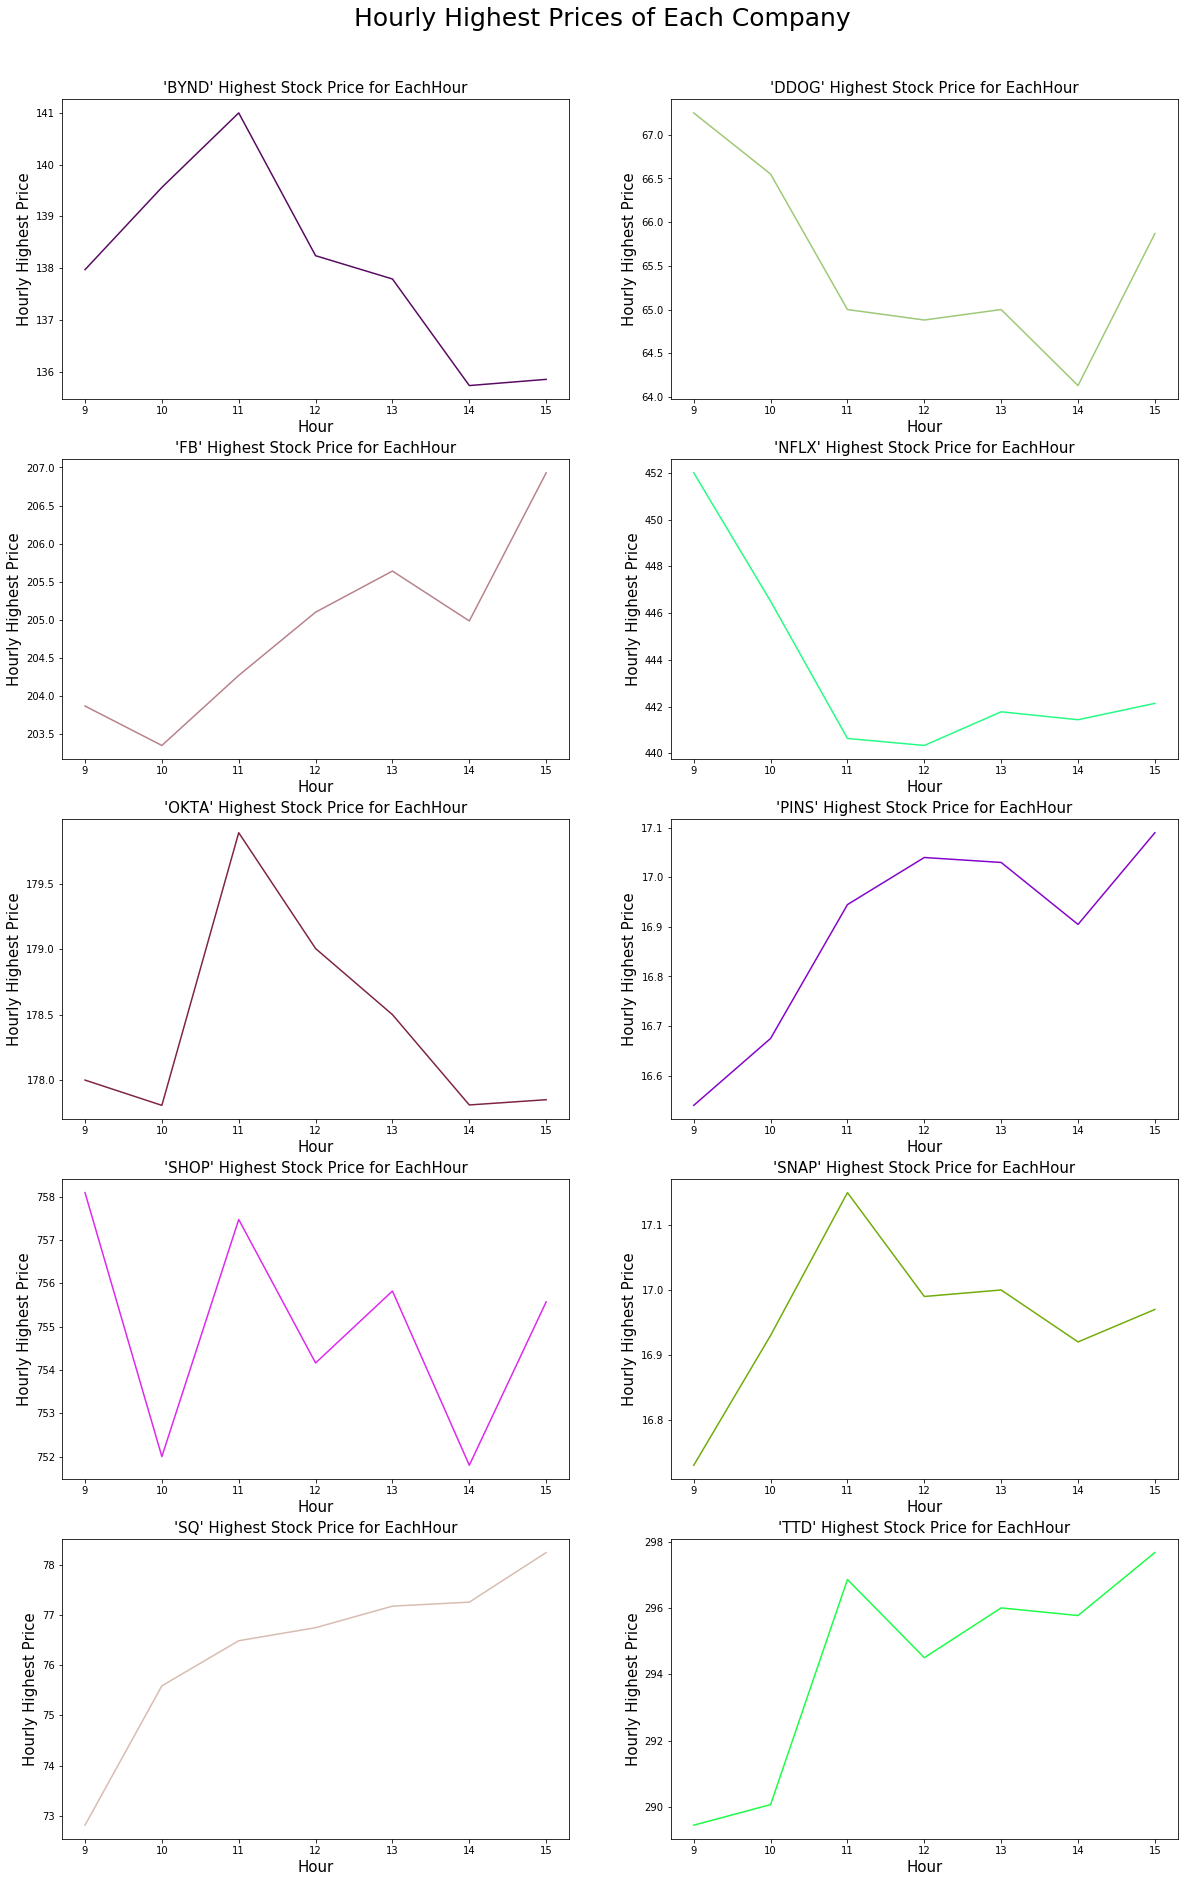

In [16]:
i = 1
parentFig = plt.figure(figsize =(20,32))

for c in companyList:
    df_for_plot = financeData[financeData['CompanyName'] == c]
    
    plt.subplot(5,2,i)
    rgb = np.random.rand(3,)
    
    plt.plot(df_for_plot.Hour, df_for_plot.HighestPrice, color= rgb)
    plt.title(f"'{c}' Highest Stock Price for EachHour",fontsize=15)
    plt.xlabel("Hour", size=15)
    plt.ylabel("Hourly Highest Price", size=15)
    i+=1
parentFig.suptitle('Hourly Highest Prices of Each Company', y=0.92,fontsize=25)    
plt.show()


In [17]:
dfChange = pd.DataFrame(columns=['Company_Name', 'First_Hour', 'Last_Hour', 'Difference'])
dfChange

,Company_Name,First_Hour,Last_Hour,Difference


In [18]:
i = 0

for c in companyList:
    dfCompany = financeData[financeData['CompanyName'] == c]
    
    firstHighest = dfCompany[dfCompany['Hour'] == 9][['HighestPrice']].max()
    lastHighest = dfCompany[dfCompany['Hour'] == 15][['HighestPrice']].max()
    
    first_hour = list(firstHighest)
    last_hour = list(lastHighest)
    difference = list(lastHighest - firstHighest)
    
    dfChange.loc[i] = [c] + first_hour + last_hour + difference
    
    i+=1
    
dfChange

,Company_Name,First_Hour,Last_Hour,Difference
0,BYND,137.970001,135.850006,-2.119995
1,DDOG,67.250000,65.869904,-1.380096
2,FB,203.867798,206.929993,3.062195
3,NFLX,452.000000,442.140015,-9.859985
4,OKTA,178.000000,177.850006,-0.149994
5,PINS,16.540001,17.090000,0.549999
6,SHOP,758.090027,755.570007,-2.520020
7,SNAP,16.730000,16.969999,0.240000
8,SQ,72.809998,78.250000,5.440002
9,TTD,289.449890,297.670013,8.220123


/Users/cemdavran/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


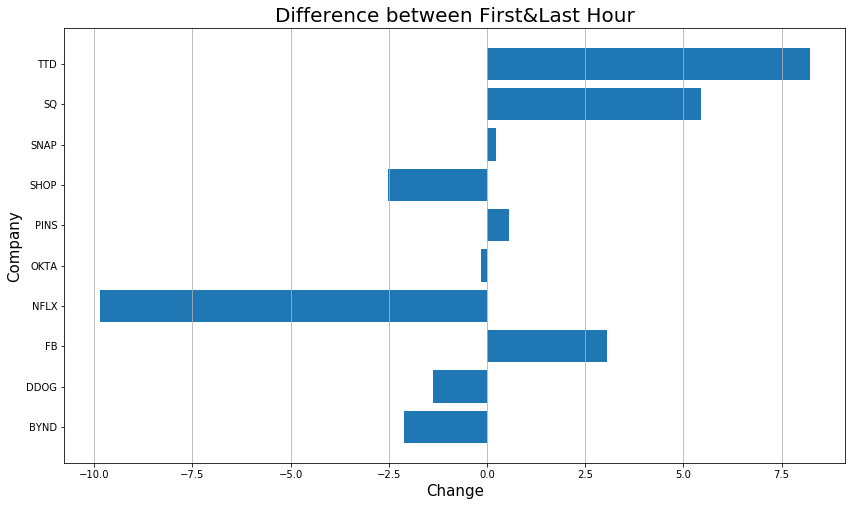

In [20]:
fig = plt.figure(figsize =(14,8))

ax = plt.barh(dfChange.Company_Name, dfChange.Difference)

ax = plt.axes()  
ax.xaxis.grid()
#ax.yaxis.grid()

plt.title("Difference between First&Last Hour",fontsize=20)
plt.xlabel("Change",fontsize=15)
plt.ylabel("Company",fontsize=15)

plt.show()

- Snap and Okta has almost no change between first and last hours.
- Highest increase in high price was on "The Trade Desk" stock.
- Highest decrease in high price was on "Netflix". 
- Square always increased during the day